Import Modules

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data

In [22]:
# Load dataset
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


#2. Data Cleaning and Transformation

In [7]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
df.isnull().sum() #checking for null values

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


## **2.1 Treating Outliers**

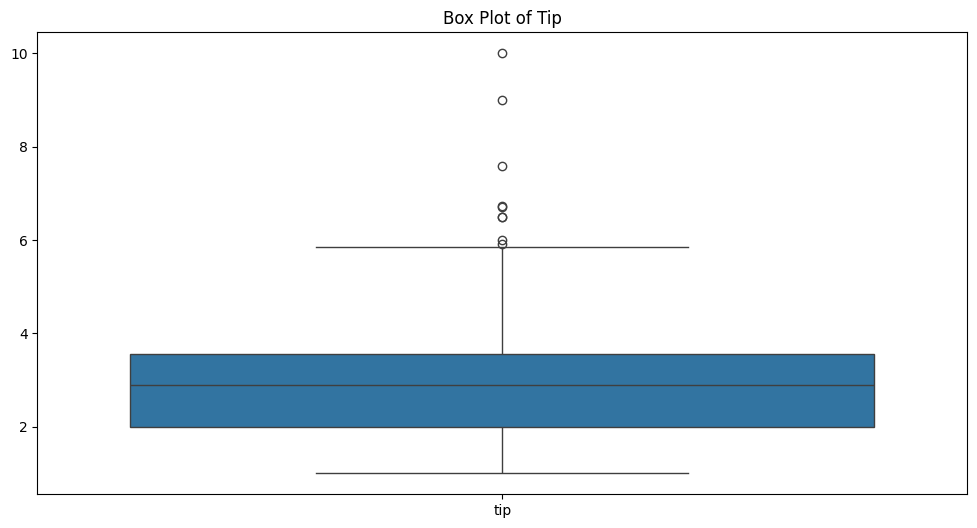

In [23]:
# Box plot for tip, total_bill, and size
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['tip']])
plt.title('Box Plot of Tip')
plt.show()

In [24]:
def remove_outliers_iqr(df1, column):
  Q1 = df1[column].quantile(0.25)
  Q3 = df1[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  df = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
  return df

# Remove outliers for 'tip'
df = remove_outliers_iqr(df, 'tip')
# Keep all relevant columns
df = df[['day', 'time', 'sex', 'smoker', 'size', 'total_bill', 'tip']]
df = df.reset_index(drop=True)

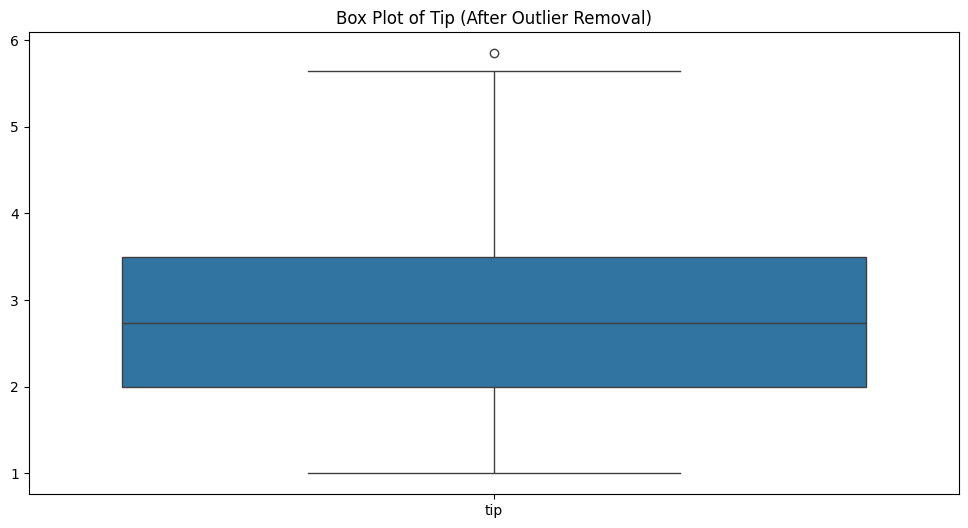

In [25]:
# Ploting the box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['tip']])
plt.title('Box Plot of Tip (After Outlier Removal)')
plt.show()

## **2.2 Exploratory Data Analaysis**

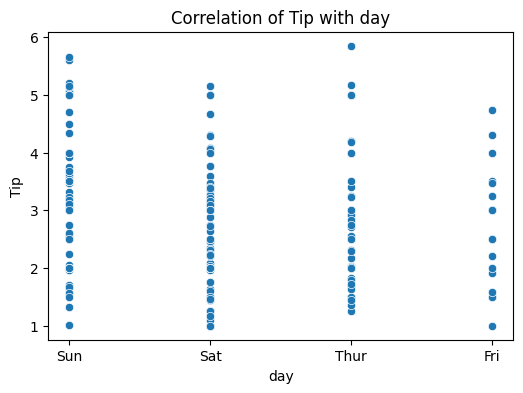

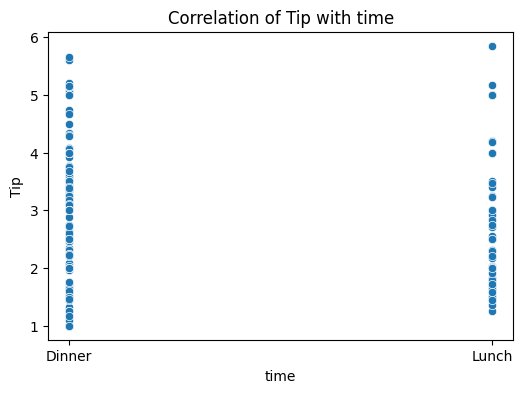

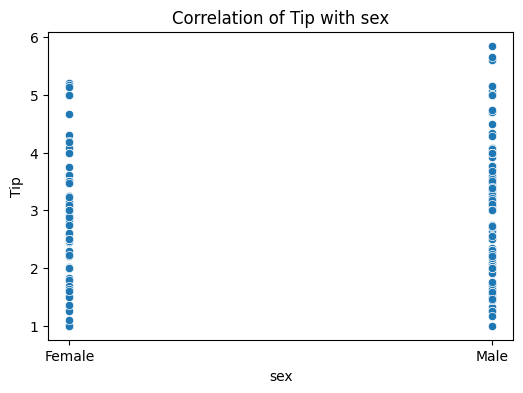

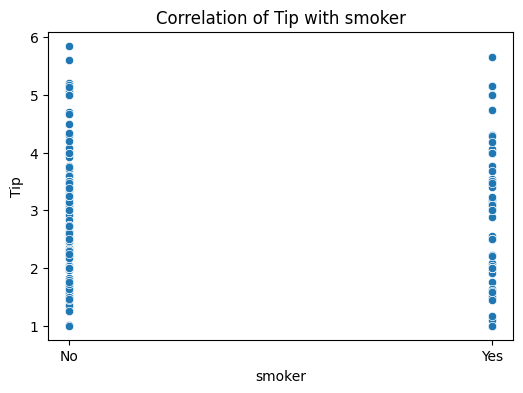

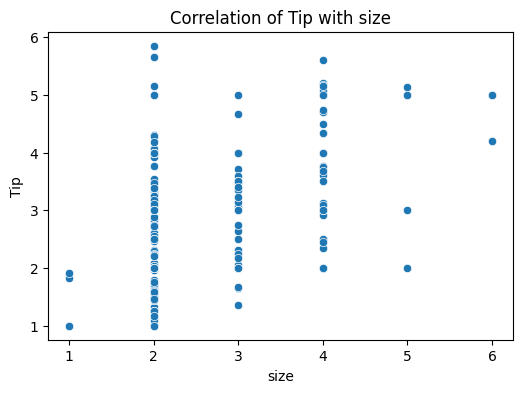

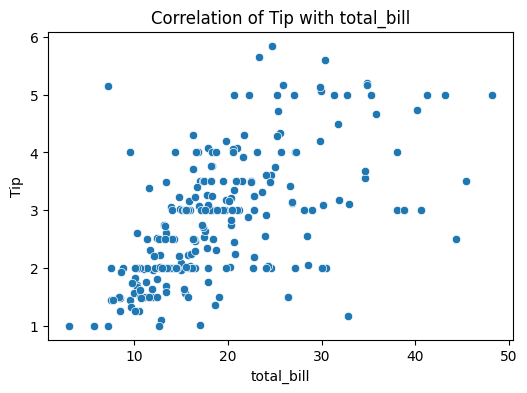

In [26]:
#Scatter Plots
for column in df.columns:
  if column != 'tip':
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=column, y='tip', data=df)
    plt.title(f'Correlation of Tip with {column}')
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.show()

The scatter plots show corelation between tip and bill amount

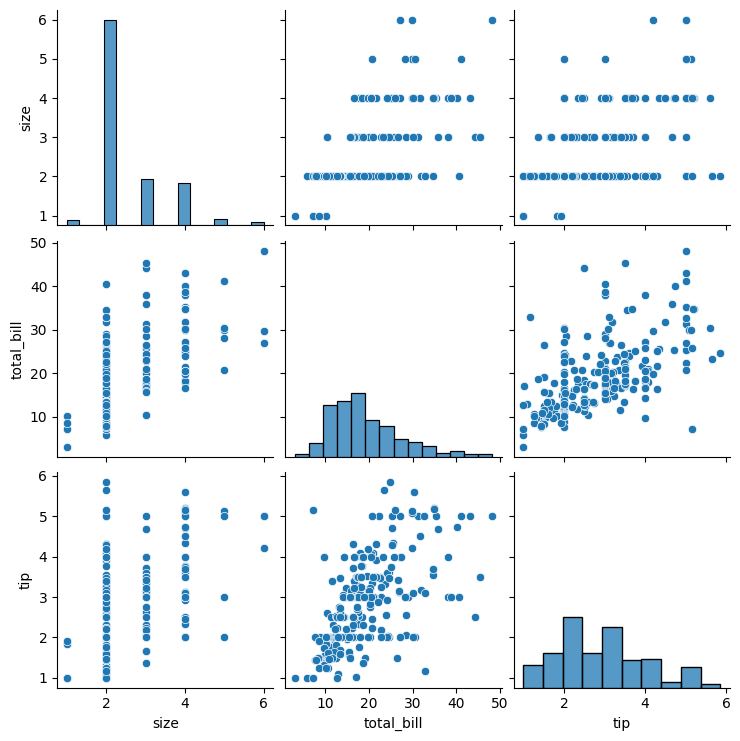

In [27]:
#pairplots

sns.pairplot(df)


In [28]:
#encoding categorical data
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})
df['time'] = df['time'].map({'Lunch': 1, 'Dinner': 2})
df['sex'] = df['sex'].map({'Female': 1, 'Male': 2})

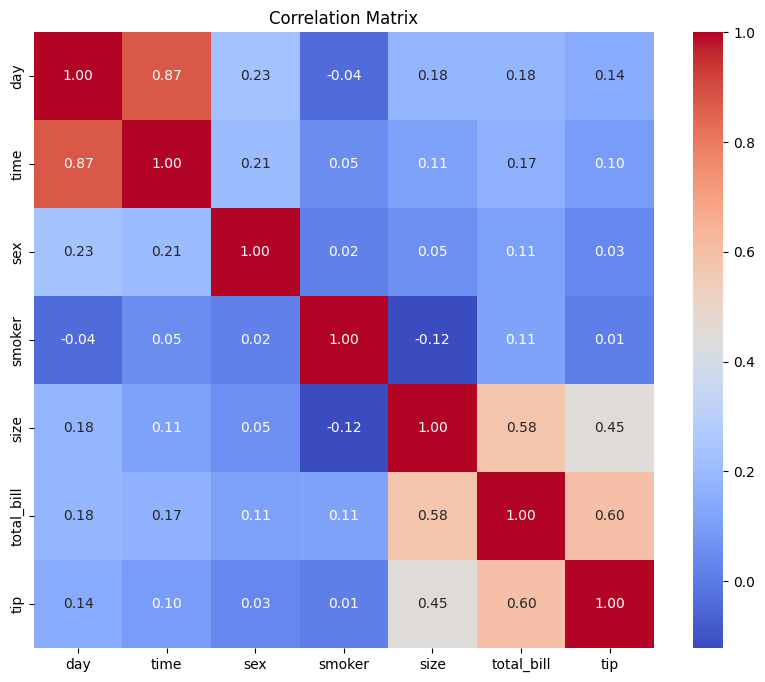

In [29]:
#Correlation Matrix (Heatmap)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

tip has the most correlation with total_bill, followed by size

#3 Spliting data into testing and traning

In [30]:
X = df[['total_bill']].values  # Features
y = df['tip'].values   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#4. Regression

## **4.1 Linear Regression**

In [31]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression MSE:', mse_linear)
print('Linear Regression R2:', r2_linear)

Linear Regression MSE: 0.7228743932540312
Linear Regression R2: 0.49454956275985673


## **4.2 Ridge Regression**

In [32]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('Ridge Regression MSE:', mse_ridge)
print('Ridge Regression R2:', r2_ridge)

Ridge Regression MSE: 0.7229022449668552
Ridge Regression R2: 0.4945300882002983


## **4.3 Lasso Regression**

In [33]:
X1 = df.drop('tip', axis=1)
y1 = df['tip']

# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=33)

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X1_train, y1_train)

# Predictions
y1_pred_lasso = lasso_reg.predict(X1_test)

# Evaluation
mse_lasso = mean_squared_error(y1_test, y1_pred_lasso)
r2_lasso = r2_score(y1_test, y1_pred_lasso)
print('Lasso Regression MSE:', mse_lasso)
print('Lasso Regression R2:', r2_lasso)

Lasso Regression MSE: 0.725886097784726
Lasso Regression R2: 0.49244370953544625


## **4.3 Decision Tree Regression**

In [34]:
tree_reg = DecisionTreeRegressor(random_state=33)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print('Decision Tree Regression MSE:', mse_tree)
print('Decision Tree Regression R2:', r2_tree)

Decision Tree Regression MSE: 1.275406382978723
Decision Tree Regression R2: 0.10820646027653424


## **4.4 Ensemble Method (Random Forest Regression)**

In [35]:
X1 = df.drop('tip', axis=1)
y1 = df['tip']

# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=33)

rf = RandomForestRegressor(n_estimators=100, random_state=33)
rf.fit(X1_train, y1_train)

y1_pred_rf = rf.predict(X1_test)

# Evaluation
mse_rf = mean_squared_error(y1_test, y1_pred_rf)
r2_rf = r2_score(y1_test, y1_pred_rf)
print('RF Regression MSE:', mse_rf)
print('RF Regression R2:', r2_rf)

RF Regression MSE: 0.8317810527659568
RF Regression R2: 0.41839951624780425


## **4.5 SVR**

In [36]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf', C=0.3, epsilon=0.001)
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print('SVR MSE:', mse_svr)
print('SVR R2:', r2_svr)

SVR MSE: 0.7146015436250578
SVR R2: 0.5003341299007171


## **4.6 K-Nearest Neighbors (KNN) Regression**

In [37]:
knn_reg = KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print('KNN Regression MSE:', mse_knn)
print('KNN Regression R2:', r2_knn)

KNN Regression MSE: 0.6646668829787236
KNN Regression R2: 0.5352495955648303


#5 Plots

## **5.1 Plotting the Predictions**

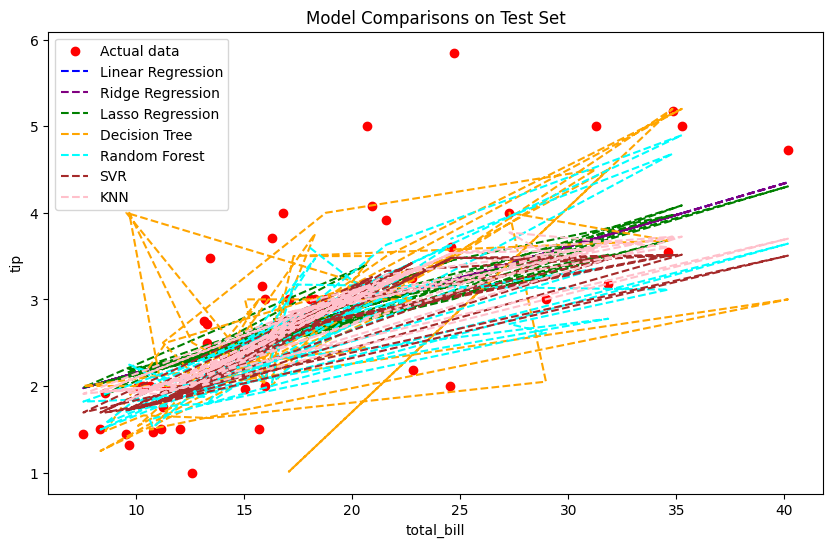

In [38]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y1_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test, y1_pred_rf, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.show()

Decision Tree and Random Forest appear to be overfitting.

## **5.2 Statistical Tests for Linearity (Rainbow Test)**

In [39]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(X.flatten(), y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Check for significance
if p_value < 0.05:
  print("There is a significant linear relationship between X and y.")
else:
  print("There is no significant linear relationship between X and y.")

Slope: 0.08008488013191653
Intercept: 1.305357275410997
R-value: 0.5950651892672253
P-value: 6.667709445738209e-24
Standard Error: 0.007085814834553036
There is a significant linear relationship between X and y.


The R-value of 0.595 suggests a moderate positive correlation. This means that the model explains a moderate amount of variance in the target variable.

## **5.3 Residual Plots**

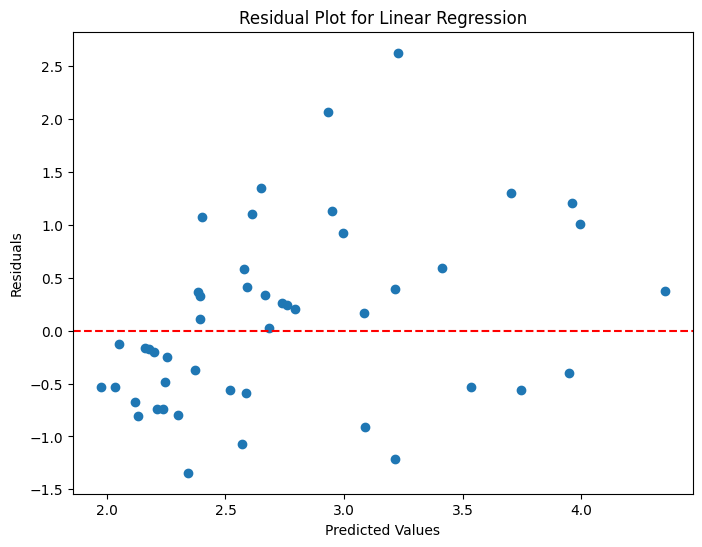

In [40]:
# Calculate residuals for linear regression
residuals = y_test - y_pred_linear

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

The plot after removing outliers is no longer  funnel-shaped.

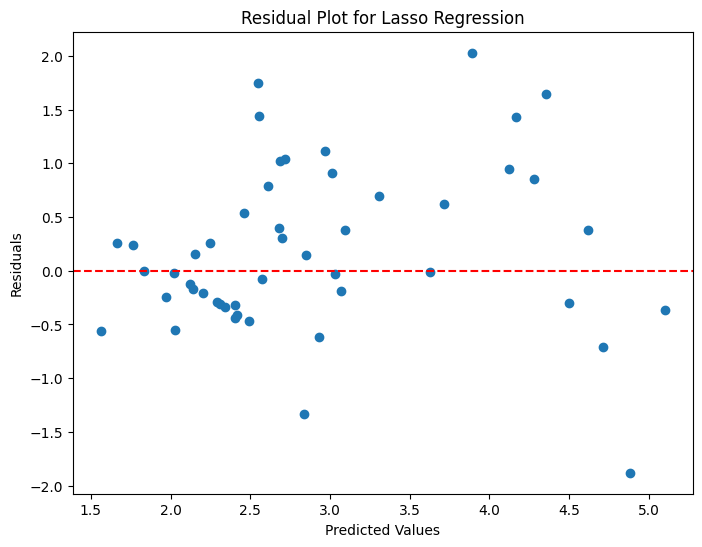

In [194]:
# Calculate residuals for Lasso regression without removing outliers
residuals = y1_test - y1_pred_lasso

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y1_pred_lasso, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Lasso Regression')
plt.show()

The residual plot with outliers was funnel-shaped.

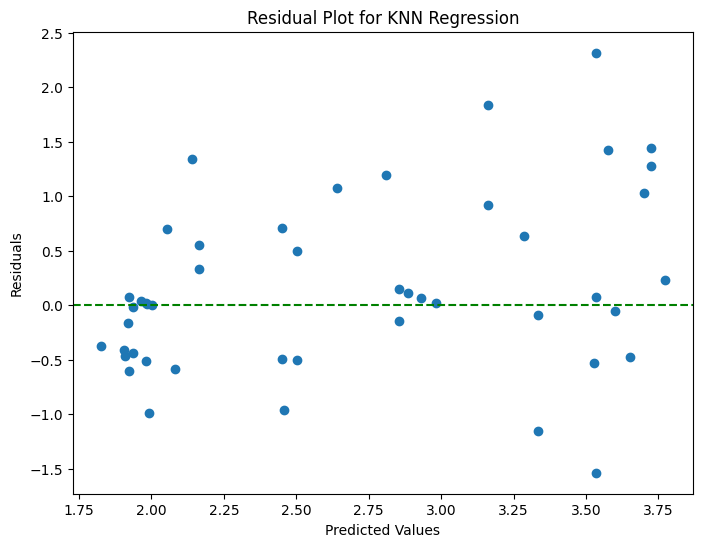

In [42]:
# Calculate residuals for KNN regression after removing outliers
residuals = y_test - y_pred_knn

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_knn, residuals)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN Regression')
plt.show()

The KNN residual plot, (after removing outliers) also, is no longer funnel-shaped.

#6 Evaluation

In [41]:
#After fitting and evaluating all models
print(f"Linear Regression - R-squared: {r2_linear}, MSE: {mse_linear}")
print(f"Ridge Regression - R-squared: {r2_ridge}, MSE: {mse_ridge}")
print(f"Lasso Regression - R-squared: {r2_lasso}, MSE: {mse_lasso}")
print(f"Decision Tree Regression - R-squared: {r2_tree}, MSE: {mse_tree}")
print(f"Random Forest Regression - R-squared: {r2_rf}, MSE: {mse_rf}")
print(f"SVR - R-squared: {r2_svr}, MSE: {mse_svr}")
print(f"KNN Regression - R-squared: {r2_knn}, MSE: {mse_knn}")

Linear Regression - R-squared: 0.49454956275985673, MSE: 0.7228743932540312
Ridge Regression - R-squared: 0.4945300882002983, MSE: 0.7229022449668552
Lasso Regression - R-squared: 0.49244370953544625, MSE: 0.725886097784726
Decision Tree Regression - R-squared: 0.10820646027653424, MSE: 1.275406382978723
Random Forest Regression - R-squared: 0.41839951624780425, MSE: 0.8317810527659568
SVR - R-squared: 0.5003341299007171, MSE: 0.7146015436250578
KNN Regression - R-squared: 0.5352495955648303, MSE: 0.6646668829787236


**Best Performing Model: KNN Regression:**
KNN outperforms all other models with *the highest R-squared (0.54) and the lowest MSE (0.66).* This indicates that KNN is capturing the underlying patterns in the data better than the other models.
Recommendation: KNN would be a good choice for making predictions on tip amounts based on the predictors you have.

**SVR and Linear Models (Ridge, Linear):**
*SVR also performs well with R-squared = 0.50 and MSE = 0.71*, making it a close second to KNN.
The linear models (Linear and Ridge Regression) provide solid performance but are outperformed by the more complex models (SVR, KNN).

**Decision Tree and Random Forest:**
Decision Trees and Random Forests are underperforming in this case. The Decision Tree model is especially poor, showing signs of overfitting and poor generalization (this can be seen in 5.1), while Random Forests are slightly better but still weaker than other models.

# 7 Conclusion

1. *Identify which factors significantly impact tip amounts.*
 Tips are impacted by the total bill.

2. *Prediction Accuracy:*
 KNN Regression is the best performing model.

3. *Insights for Management: Provide actionable insights to improve customer service strategies and revenue management.*
 The total bill (especially higher bills) is the most important predictor of the tip. Management and servers are encouraged to reccomend choices that increase the total bill amount.
